<a href="https://colab.research.google.com/github/Athikah-aa/Shadawfox-Tasks/blob/main/Task3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")


In [ ]:

df = pd.read_csv("/content/Global_Superstore2.csv", encoding='latin1')

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [ ]:

df.dropna(inplace=True)


In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month


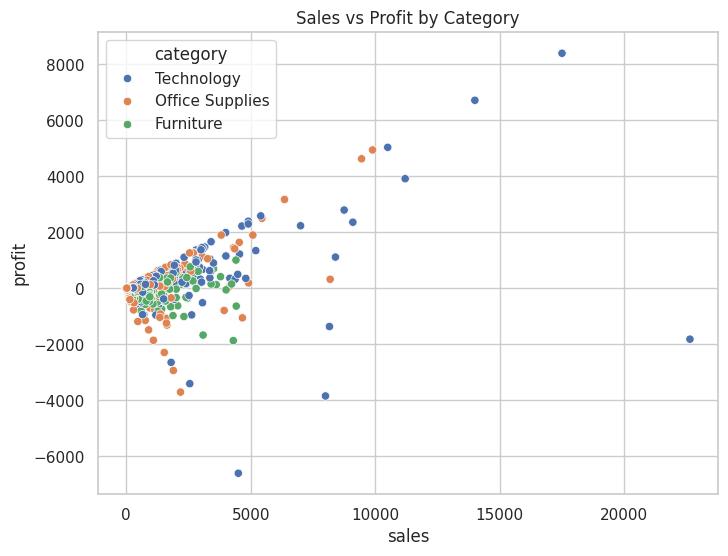

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sales', y='profit', data=df, hue='category')
plt.title('Sales vs Profit by Category')
plt.show()

/tmp/ipython-input-1965408543.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='profit', data=df, estimator=sum, ci=None)


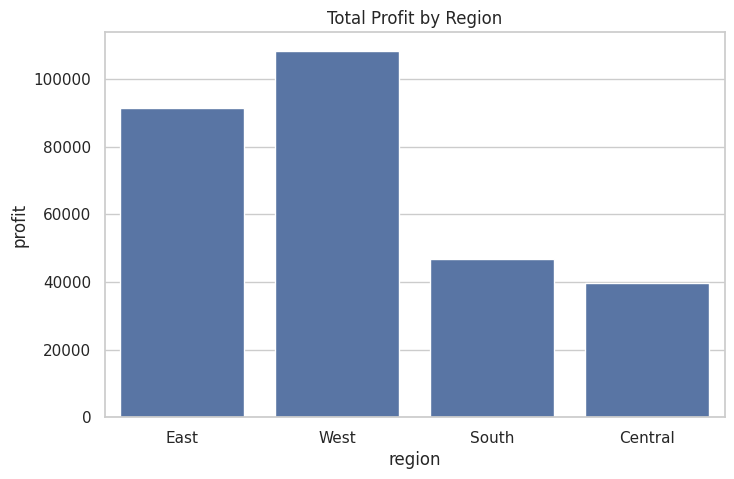

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='region', y='profit', data=df, estimator=sum, ci=None)
plt.title('Total Profit by Region')
plt.show()

/tmp/ipython-input-2750785101.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='profit', data=df, estimator=sum, ci=None)


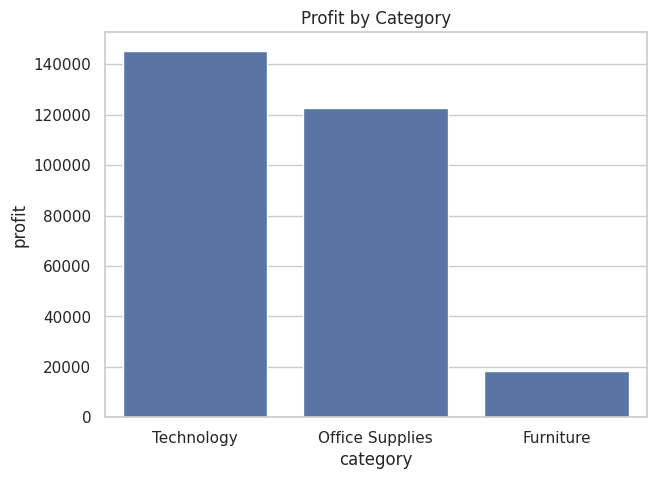

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='category', y='profit', data=df, estimator=sum, ci=None)
plt.title('Profit by Category')
plt.show()

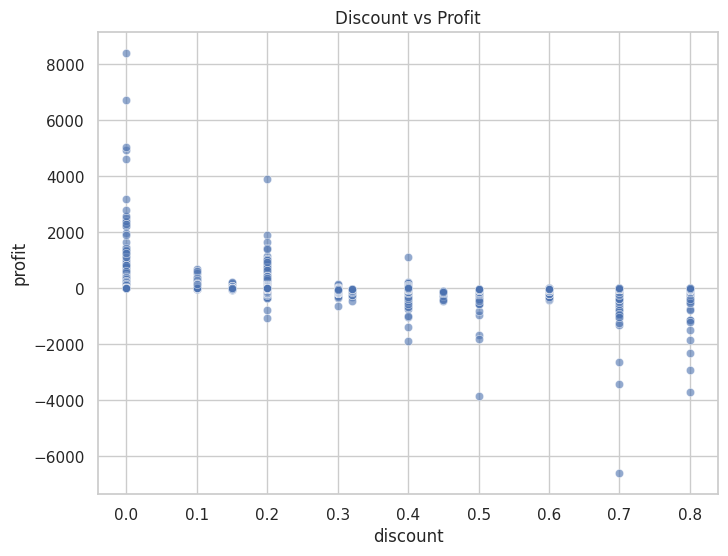

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='discount', y='profit', data=df, alpha=0.6)
plt.title('Discount vs Profit')
plt.show()

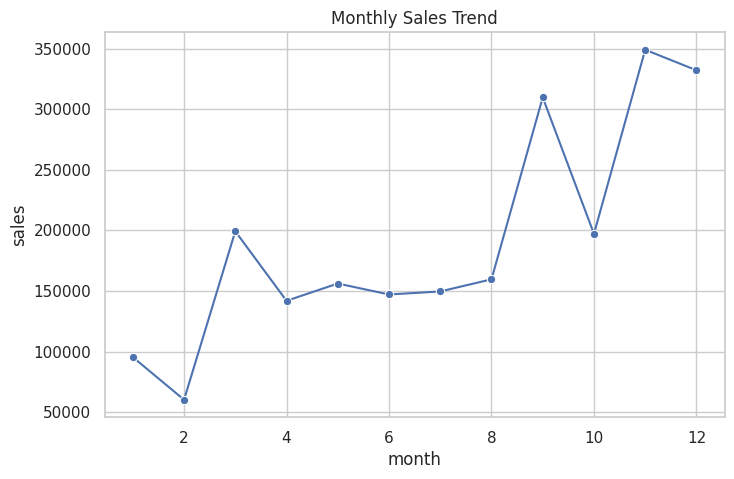

In [ ]:
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(x='month', y='sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.show()

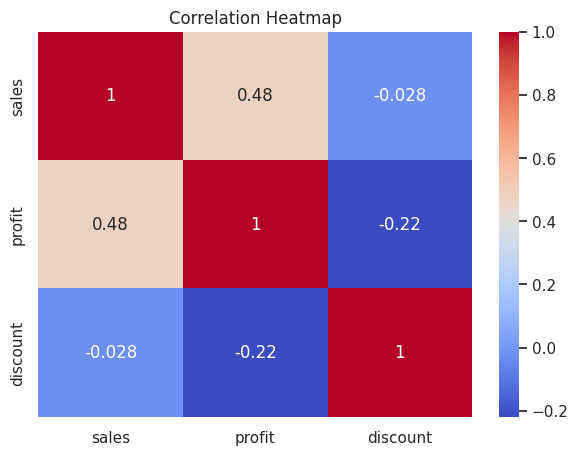

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['sales','profit','discount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from google.colab import files
files.download("/content/Global_Superstore2.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.to_excel("/content/Global_Superstore2.xlsx", index=False)

